#**Exam**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

#**Q:1**

In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/weather_classification_data.csv'  # Path to your file
data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print("Original Data:")
print(data.head())

# Perform one-hot encoding on categorical columns
# Replace 'categorical_column' with the column(s) you want to encode
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the encoded data
print("\nEncoded Data:")
print(encoded_data.head())

# Save the encoded dataset (optional)
encoded_data.to_csv('encoded_weather_data.csv', index=False)

Original Data:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0           14        73         9.5                 82  partly cloudy   
1           39        96         8.5                 71  partly cloudy   
2           30        64         7.0                 16          clear   
3           38        83         1.5                 82          clear   
4           27        74        17.0                 66       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  

Enco

#**Q:2**

In [4]:
#Display summary statistics
print(encoded_data.describe())

#Display information about data types and missing values
print(encoded_data.info())

       Temperature    Humidity  Wind Speed  Precipitation (%)  \
count   645.000000  645.000000  645.000000         645.000000   
mean     19.108527   69.038760    9.480620          53.364341   
std      16.372527   21.034283    7.005711          32.104047   
min     -24.000000   20.000000    0.000000           0.000000   
25%       8.000000   57.000000    4.500000          19.000000   
50%      21.000000   71.000000    8.000000          57.000000   
75%      31.000000   85.000000   13.500000          82.000000   
max      80.000000  109.000000   47.000000         109.000000   

       Atmospheric Pressure    UV Index  Visibility (km)  
count            645.000000  645.000000       645.000000  
mean            1007.259876    3.883721         5.342636  
std               34.898890    3.759105         3.114601  
min              822.660000    0.000000         0.000000  
25%              995.050000    1.000000         3.000000  
50%             1008.690000    3.000000         5.000000  
7

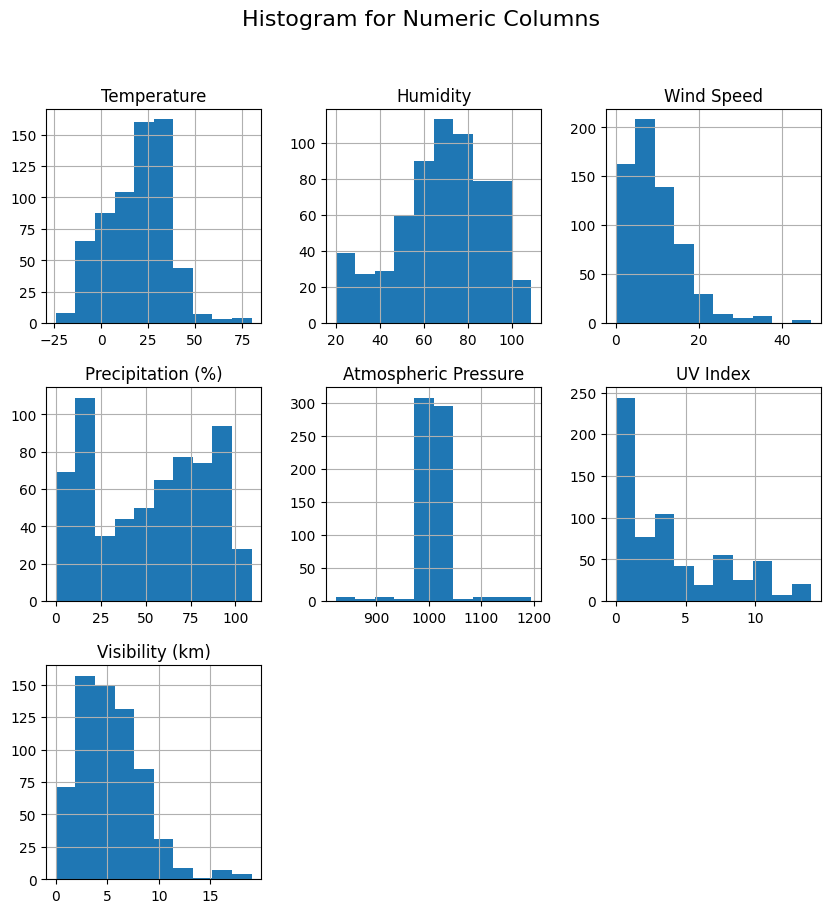

In [5]:
import matplotlib.pyplot as plt

#Histogram for all numeric columns
encoded_data.hist(figsize=(10, 10))
plt.suptitle("Histogram for Numeric Columns", fontsize=16)
plt.show()

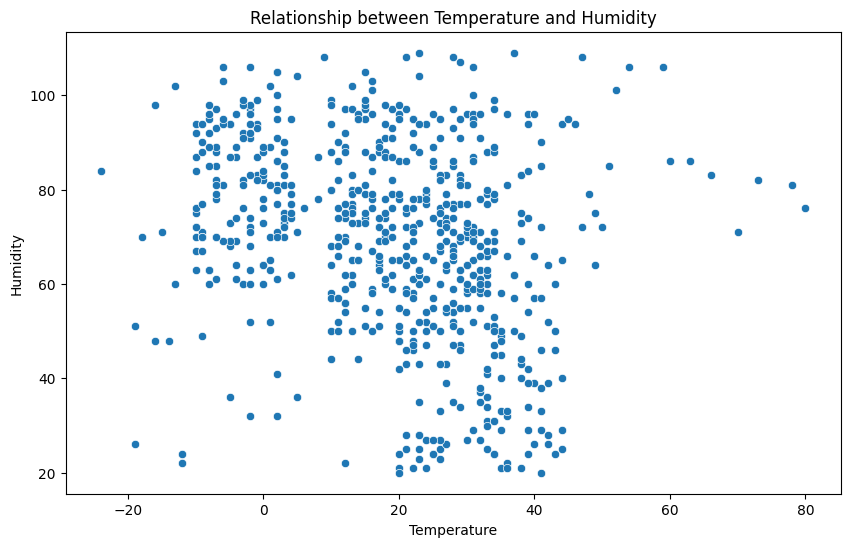

In [9]:
#scatter plot:
import seaborn as sns

#Example: plotting the relationship between Temperature and humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=encoded_data)
plt.title("Relationship between Temperature and Humidity")
plt.show()

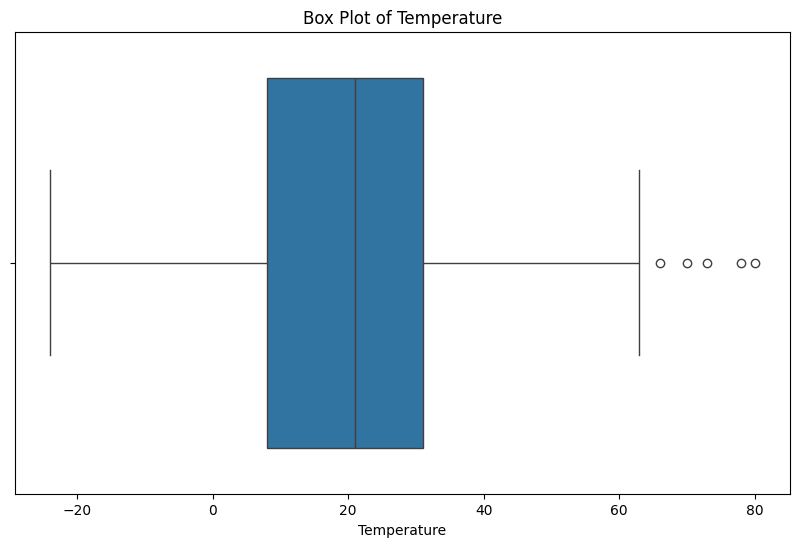

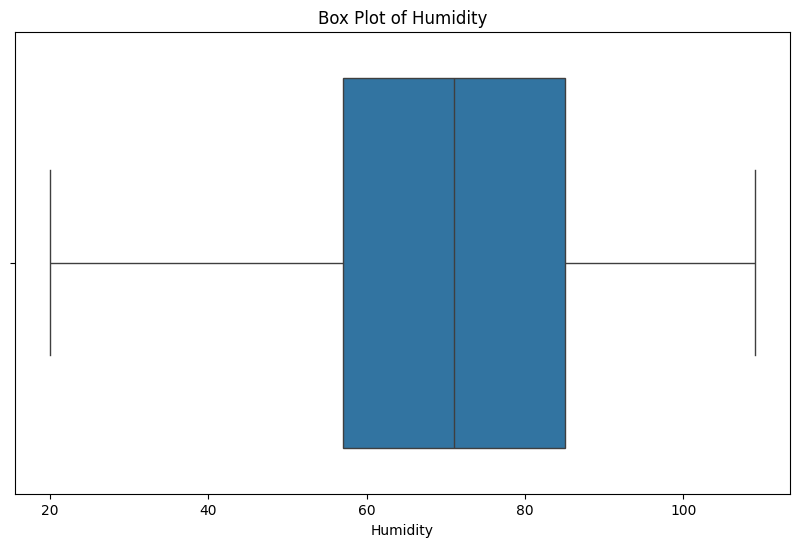

In [10]:
#Box plot:
#Box plot for Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Temperature', data=encoded_data)
plt.title("Box Plot of Temperature")
plt.show()
#Box plot for Humidity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Humidity', data=encoded_data)
plt.title("Box Plot of Humidity")
plt.show()

In [11]:
#handeling missing data:
#check for missing values
print(encoded_data.isnull().sum())

#Option 1: Fill missing values with the median (for numerical columns)
encoded_data.fillna(encoded_data.median(), inplace=True)

#Option 2: Drop rows with missing values
#encoded_data.dropna(inplace=True)

#varify if missing values are handled
print(encoded_data.isnull().sum())

Temperature                  0
Humidity                     0
Wind Speed                   0
Precipitation (%)            0
Atmospheric Pressure         0
UV Index                     0
Visibility (km)              0
Cloud Cover_cloudy           0
Cloud Cover_overcast         0
Cloud Cover_partly cloudy    0
Season_Spring                0
Season_Summer                0
Season_Winter                0
Location_inland              0
Location_mountain            0
Weather Type_Rainy           0
Weather Type_Snowy           0
Weather Type_Sunny           0
dtype: int64
Temperature                  0
Humidity                     0
Wind Speed                   0
Precipitation (%)            0
Atmospheric Pressure         0
UV Index                     0
Visibility (km)              0
Cloud Cover_cloudy           0
Cloud Cover_overcast         0
Cloud Cover_partly cloudy    0
Season_Spring                0
Season_Summer                0
Season_Winter                0
Location_inland           

#**Q:3**

In [16]:
x=encoded_data.drop('Season_Summer',axis=1) #Features
y=encoded_data['Weather Type_Rainy'] #Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# Import the necessary library
from sklearn.preprocessing import StandardScaler
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create an instance of the StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#initialize the logistic regression model
model = LogisticRegression()

#train the model
model.fit(x_train_scaled, y_train)

#make predictions on the test set
y_pred = model.predict(x_test_scaled)

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = encoded_data

# Split the data into training and testing sets
X = data.drop('Weather Type_Sunny', axis=1)
y = data['Weather Type_Sunny']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Logistic Regression Accuracy: 0.95
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the data
data = encoded_data

# Split the data into training and testing sets
X = data.drop('Weather Type_Sunny', axis=1)
y = data['Weather Type_Sunny']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1-score: {lr_f1:.2f}")
print("Confusion Matrix:")
print(lr_cm)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print("\nDecision Tree:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1-score: {dt_f1:.2f}")
print("Confusion Matrix:")
print(dt_cm)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-score: {rf_f1:.2f}")
print("Confusion Matrix:")
print(rf_cm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.95
Precision: 0.85
Recall: 0.97
F1-score: 0.90
Confusion Matrix:
[[89  6]
 [ 1 33]]

Decision Tree:
Accuracy: 0.94
Precision: 0.82
Recall: 0.97
F1-score: 0.89
Confusion Matrix:
[[88  7]
 [ 1 33]]

Random Forest:
Accuracy: 0.99
Precision: 0.97
Recall: 1.00
F1-score: 0.99
Confusion Matrix:
[[94  1]
 [ 0 34]]


#**Q:4**

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = encoded_data

# Split the data into features (X) and target (y)
X = data.drop('Weather Type_Sunny', axis=1)
y = data['Weather Type_Sunny']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the test set
y_pred = model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.15
Mean Squared Error: 0.05
R-squared: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


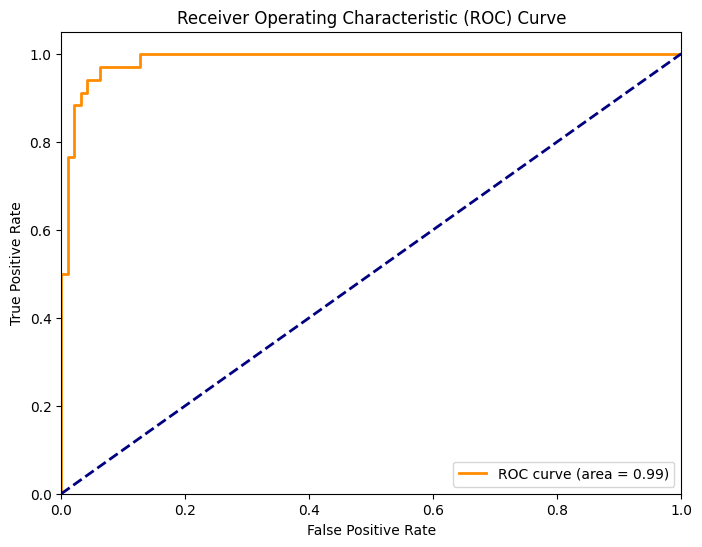

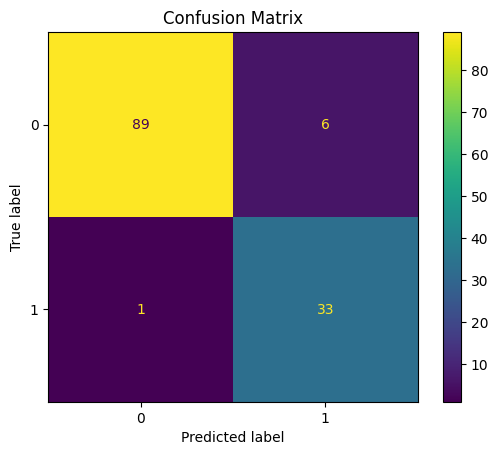

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Load the data
data = encoded_data

# Split the data into training and testing sets
X = data.drop('Weather Type_Sunny', axis=1)
y = data['Weather Type_Sunny']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()